In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
print(titanic.head())
print("\n")
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

### regplot() : 회귀선이 있는 산점도

#### 스타일 테마 설정 5가지: darkgrid, whitegrid, dark, white, ticks

In [4]:
sns.set_style("darkgrid")

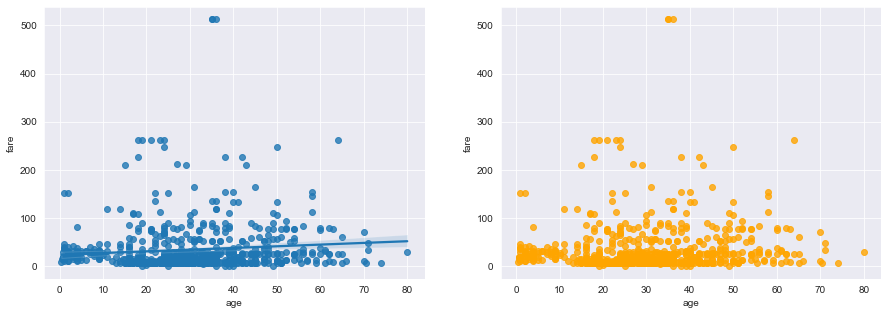

In [5]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax1)
sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax2, fit_reg=False, color="orange")

plt.show()

### distplot() : 히스토그램 / 커널 밀도 그래프

#### `distplot`은 향후 버전에서 제거 가능성이 있음. displot, histplot으로 대체 방법 숙지 필요.

In [6]:
plt.clf()

<Figure size 432x288 with 0 Axes>

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'titanic fare - hist')

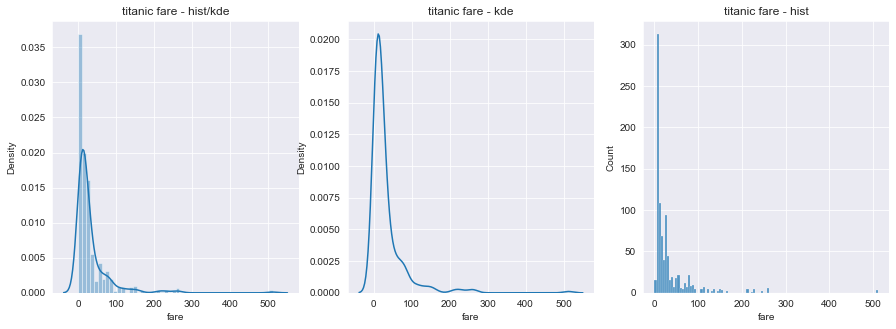

In [7]:
fig =  plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# distplot()
sns.distplot(titanic['fare'], ax = ax1)

# kedplot()
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

# histplot()
sns.histplot(x = 'fare', data = titanic, ax = ax3)

# 차트 제목 표시
ax1.set_title("titanic fare - hist/kde")
ax2.set_title("titanic fare - kde")
ax3.set_title("titanic fare - hist")

### heatmap() : 히트맵

In [8]:
table = titanic.pivot_table(index = ['sex'], columns=['class'], aggfunc = 'size')

In [9]:
plt.clf()

<Figure size 432x288 with 0 Axes>

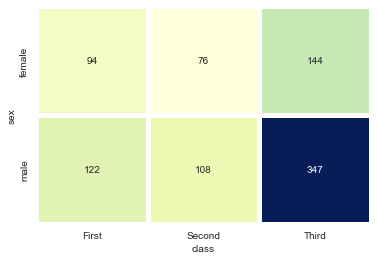

In [10]:
sns.heatmap(table, 
            annot = True, fmt = 'd',  # 데이터 값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu', linewidth = 5,
            cbar = False
           )
plt.show()

### stripplot() / swarmplot() : 범주형 데이터 산점도

In [11]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [12]:
sns.set_style("whitegrid")

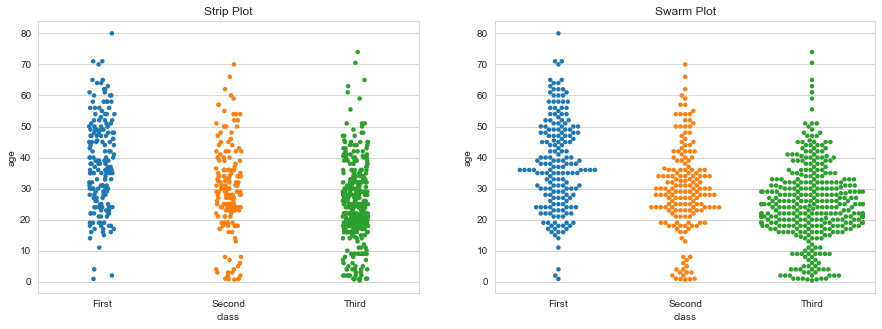

In [13]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산을 고려하지 않음
sns.stripplot(x =  "class", y = "age", data = titanic, ax = ax1, size = 4.5)

# 이산형 변수의 분포 - 데이터 분산을 고려함
sns.swarmplot(x = "class", y = "age", data = titanic, ax = ax2, size = 4.5)

# 마커 사이즈를 표시하지 않을 경우 기본값은 5이며, 현재 그래프 상에서 데이터들이 겹친다는 warning이 발생함

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

### barplot() : 막대그래프

In [14]:
plt.clf()

<Figure size 432x288 with 0 Axes>

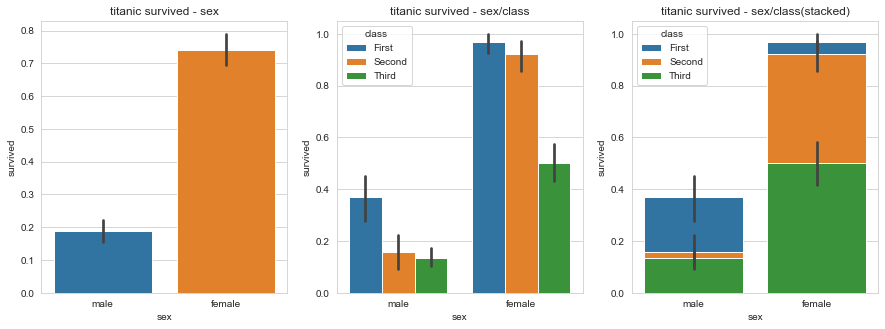

In [15]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data = titanic, ax = ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### countplot() : 빈도그래프

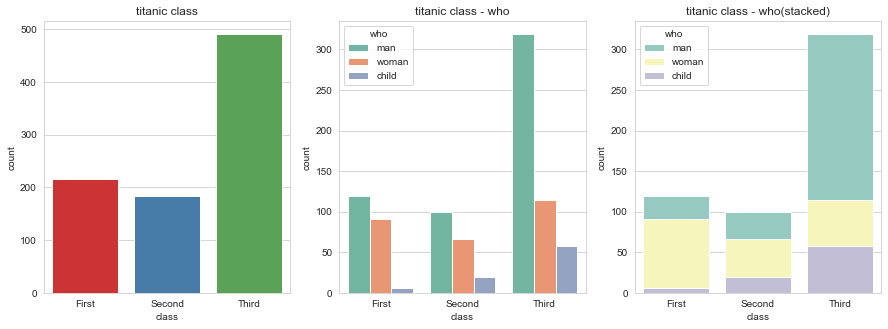

In [16]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(x = 'class',
              palette = 'Set1',     # 색 구성 옵션
              data = titanic,
              ax = ax1
             )
sns.countplot(x = 'class', hue = 'who', palette = 'Set2', data = titanic, ax = ax2)
sns.countplot(x = 'class', hue = 'who', palette = 'Set3', dodge = False, data = titanic, ax = ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### boxplot() :     박스 플롯 / violinplot() : 바이올린 그래프

In [17]:
plt.clf()

<Figure size 432x288 with 0 Axes>

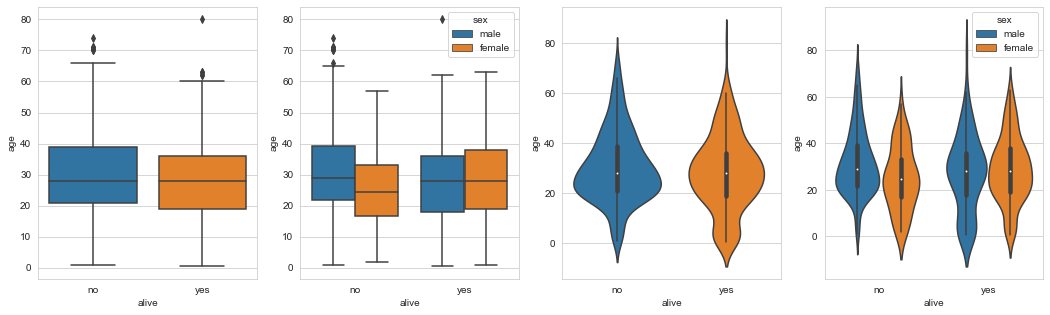

In [18]:
fig = plt.figure(figsize = (18, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

sns.boxplot(x = "alive", y = "age", data = titanic, ax = ax1)
sns.boxplot(x = "alive", y = "age", hue = "sex", data = titanic, ax = ax2)
sns.violinplot(x = "alive", y = "age", data = titanic, ax = ax3)
sns.violinplot(x = "alive", y = "age", hue = "sex", data = titanic, ax = ax4)

plt.show()

### jointplot() : 조인트 그래프
(산점도 + 히스토그램)

In [19]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [20]:
sns.set_style("whitegrid")

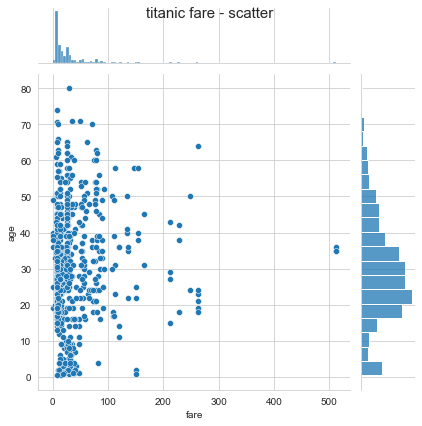

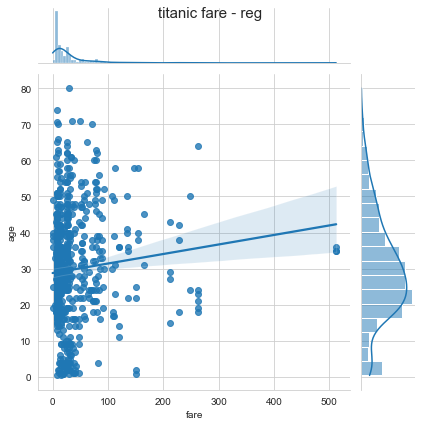

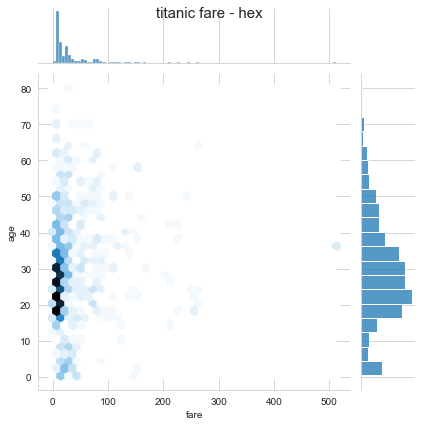

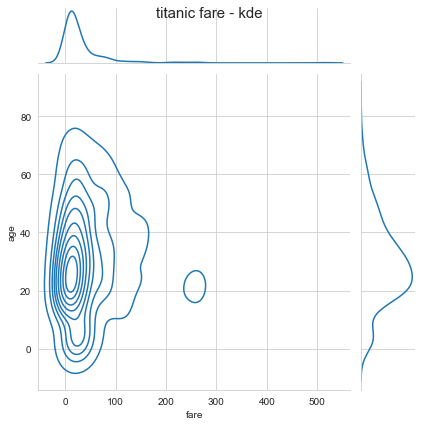

In [21]:
# 기본값
j1 = sns.jointplot(x = 'fare', y = 'age', data = titanic)
# 회귀선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data = titanic)
# 육각그래프
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data = titanic)
# 커널 밀집 그래프
j4 = sns.jointplot(x = 'fare', y = 'age', kind = 'kde', data = titanic)

j1.fig.suptitle('titanic fare - scatter', size =15)
j2.fig.suptitle('titanic fare - reg', size =15)
j3.fig.suptitle('titanic fare - hex', size =15)
j4.fig.suptitle('titanic fare - kde', size =15)

plt.show()